# Machine Learning Unsupervised
## t-SNE manifold learning algorithm

t-SNE [1] is a high-dimensional data visualization tool. It seeks to reduce the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data by converting similarities between data points to joint probabilities. The cost function of t-SNE is not convex, which means that we can get different outcomes with different initializations.



[1] van der Maaten, L.J.P.; Hinton, G.E. Visualizing High-Dimensional Data Using t-SNE. 
Journal of Machine Learning Research 9:2579-2605, 2008. Use Case for t-SNE

In [45]:
# needed modules
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV
import yaml
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns 

# The data
Examine the shape and quantity of NAN values.
The skewness must also be checked.
Check the columns for colering and clustering as well.


In [37]:
# load the data in with the config file
with open("config.yml") as config:
    input_files = yaml.safe_load(config)
    df = pd.read_csv(input_files["liver"])

df.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,GSM362958.CEL.gz,HCC,6.801198,4.553189,6.787790,5.430893,3.250222,6.272688,3.413405,3.374910,...,10.735084,10.398843,12.298551,12.270505,3.855588,3.148321,3.366087,3.199008,3.160388,3.366417
1,GSM362959.CEL.gz,HCC,7.585956,4.193540,3.763183,6.003593,3.309387,6.291927,3.754777,3.587603,...,11.528447,11.369919,12.867048,12.560433,4.016561,3.282867,3.541994,3.548680,3.460083,3.423348
2,GSM362960.CEL.gz,HCC,7.803370,4.134075,3.433113,5.395057,3.476944,5.825713,3.505036,3.687333,...,10.892460,10.416151,12.356337,11.888482,3.839367,3.598851,3.516791,3.484089,3.282626,3.512024
3,GSM362964.CEL.gz,HCC,6.920840,4.000651,3.754500,5.645297,3.387530,6.470458,3.629249,3.577534,...,10.686871,10.524836,12.006596,11.846195,3.867602,3.180472,3.309547,3.425501,3.166613,3.377499
4,GSM362965.CEL.gz,HCC,6.556480,4.599010,4.066155,6.344537,3.372081,5.439280,3.762213,3.440714,...,11.014454,10.775566,12.657182,12.573076,4.091440,3.306729,3.493704,3.205771,3.378567,3.392938


In [38]:
# Examine the data properties 
amount_na= {}
# check shape
print(f"columns in the dataframe:{df.shape[1]}. Amount of rows {df.shape[0]}.")
print(df.dtypes)
# check na
for col in df.columns:
    amount_na[col] = df[col].isna().sum()
sorted_amount_na = sorted(amount_na.items(), key=lambda x:x[1], reverse=True)
print(sorted_amount_na)
print(df["type"].unique(), "<- The groups in the data")


columns in the dataframe:22279. Amount of rows 357.
samples             object
type                object
1007_s_at          float64
1053_at            float64
117_at             float64
                    ...   
AFFX-ThrX-5_at     float64
AFFX-ThrX-M_at     float64
AFFX-TrpnX-3_at    float64
AFFX-TrpnX-5_at    float64
AFFX-TrpnX-M_at    float64
Length: 22279, dtype: object
[('samples', 0), ('type', 0), ('1007_s_at', 0), ('1053_at', 0), ('117_at', 0), ('121_at', 0), ('1255_g_at', 0), ('1294_at', 0), ('1316_at', 0), ('1320_at', 0), ('1405_i_at', 0), ('1431_at', 0), ('1438_at', 0), ('1487_at', 0), ('1494_f_at', 0), ('1598_g_at', 0), ('160020_at', 0), ('1729_at', 0), ('1773_at', 0), ('177_at', 0), ('179_at', 0), ('1861_at', 0), ('200000_s_at', 0), ('200001_at', 0), ('200002_at', 0), ('200003_s_at', 0), ('200004_at', 0), ('200005_at', 0), ('200006_at', 0), ('200007_at', 0), ('200008_s_at', 0), ('200009_at', 0), ('200010_at', 0), ('200011_s_at', 0), ('200012_x_at', 0), ('200013_at', 0), ('

CSV file contains 22277 gene expression levels (columns) from 357 samples (rows). This dataset contains two separate types (column "type").
also there are no NAN values pressent in non of the columns.
We shall remove the sample names because they are no longer required.
Colors will be entered into the Type column.

In [39]:
types = list(df["type"])
df = df.drop(columns=["samples","type"])
df.head()

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,6.801198,4.553189,6.787790,5.430893,3.250222,6.272688,3.413405,3.374910,3.654116,3.804983,...,10.735084,10.398843,12.298551,12.270505,3.855588,3.148321,3.366087,3.199008,3.160388,3.366417
1,7.585956,4.193540,3.763183,6.003593,3.309387,6.291927,3.754777,3.587603,5.137159,8.622475,...,11.528447,11.369919,12.867048,12.560433,4.016561,3.282867,3.541994,3.548680,3.460083,3.423348
2,7.803370,4.134075,3.433113,5.395057,3.476944,5.825713,3.505036,3.687333,4.515175,12.681439,...,10.892460,10.416151,12.356337,11.888482,3.839367,3.598851,3.516791,3.484089,3.282626,3.512024
3,6.920840,4.000651,3.754500,5.645297,3.387530,6.470458,3.629249,3.577534,5.192624,11.759412,...,10.686871,10.524836,12.006596,11.846195,3.867602,3.180472,3.309547,3.425501,3.166613,3.377499
4,6.556480,4.599010,4.066155,6.344537,3.372081,5.439280,3.762213,3.440714,4.961625,10.318552,...,11.014454,10.775566,12.657182,12.573076,4.091440,3.306729,3.493704,3.205771,3.378567,3.392938


# Visualization with t-SNE and PCA

We can now use both t-SNE and PCA to visualize the data


In [40]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

tsne = TSNE(n_components=2,learning_rate="auto",init="random",random_state=42)
tsne_cluster = tsne.fit_transform(df_scaled)


In [41]:
# make a data frame out of the data
tsne_df = pd.DataFrame(data= tsne_cluster,columns=["X","Y"])
tsne_df["types"] = types # add the types for the color later

<function matplotlib.pyplot.show(close=None, block=None)>

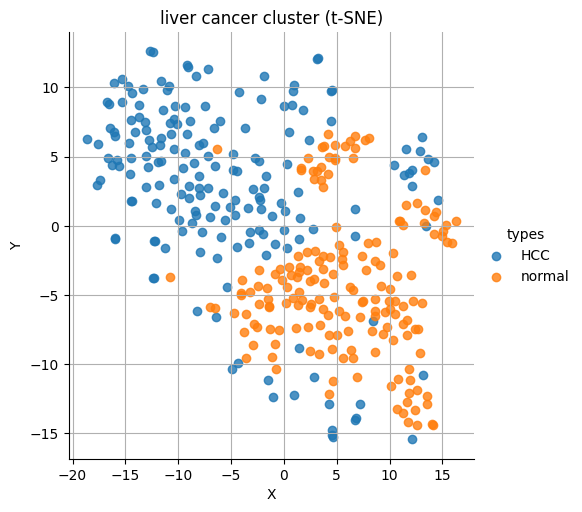

In [42]:
# plot the TSNE data 
sns.lmplot(
    x='X', 
    y='Y', 
    data=tsne_df, 
    hue='types', 
    fit_reg=False, 
    legend=True
    )
 
plt.title('liver cancer cluster (t-SNE)')
plt.grid()
plt.show

The grouping is adequate, but we can improve it slightly via PCA.

In [43]:
pca = PCA(n_components=2)
PCA_tsne_cluster = pca.fit_transform(df_scaled)

tsne = TSNE(n_components=2,learning_rate="auto",init="random",random_state=42)
PCA_tsne_cluster = tsne.fit_transform(PCA_tsne_cluster)

# make a data frame out of the data
PCA_tsne_df = pd.DataFrame(data=PCA_tsne_cluster,columns=["X","Y"])
PCA_tsne_df["types"] = types # add the types for the color later

<function matplotlib.pyplot.show(close=None, block=None)>

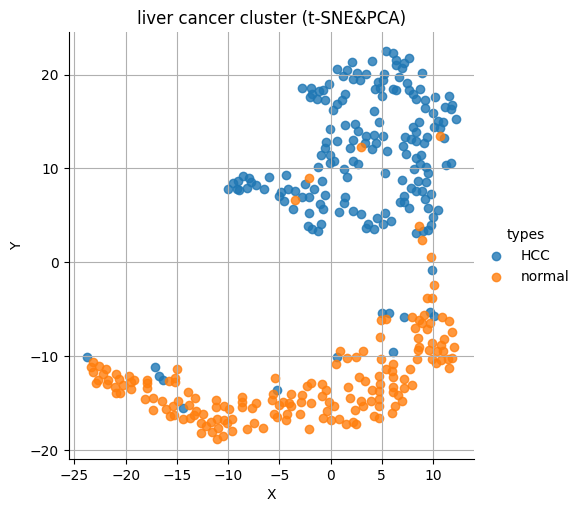

In [44]:
# plot the TSNE data 
sns.lmplot(
    x='X', 
    y='Y', 
    data=PCA_tsne_df, 
    hue='types', 
    fit_reg=False, 
    legend=True
    )
 
plt.title('liver cancer cluster (t-SNE&PCA)')
plt.grid()
plt.show

# Tuning the hyper parameters 

It looks a little better now, but it's still not that great.
To improve the results, we can tweak the hyperparameters.

In [47]:
from sklearn.metrics import silhouette_score

# Load a sample dataset (e.g., Iris dataset)
# Define the parameter grid
param_grid = {
    'n_components': [2, 3],  # Number of dimensions in the embedded space
    'perplexity': [5, 30, 50],  # Perplexity parameter
    'learning_rate': [10, 100],  # Learning rate
    'n_iter': [1000, 2000]  # Number of iterations
}

# Create the t-SNE object
tsne = TSNE()

# Create the GridSearchCV object
grid_search = GridSearchCV(tsne, param_grid, scoring=silhouette_score, cv=5)  
# Adjust the scoring metric and cv parameter as needed

# Fit the GridSearchCV object to the data
grid_search.fit(df_scaled)

# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

C:\Users\marsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\marsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\marsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\cluster\_unsupervised.py", line 117, in silhouette_score
    return np.mean(silhouette_samples(X, labels, metric=metric, **kwds))
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\U

Best Hyperparameters:  {'learning_rate': 10, 'n_components': 2, 'n_iter': 1000, 'perplexity': 5}
Best Score:  nan


This takes a long time and generates a lot of warnings, but it discovered several options to optimize it.